In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats.contingency import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import classification_report,f1_score, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [66]:
df=pd.read_csv('turkiye_student_evaluation.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [67]:
df.tail()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5819,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [68]:
df.isnull().any()

instr         False
class         False
nb.repeat     False
attendance    False
difficulty    False
Q1            False
Q2            False
Q3            False
Q4            False
Q5            False
Q6            False
Q7            False
Q8            False
Q9            False
Q10           False
Q11           False
Q12           False
Q13           False
Q14           False
Q15           False
Q16           False
Q17           False
Q18           False
Q19           False
Q20           False
Q21           False
Q22           False
Q23           False
Q24           False
Q25           False
Q26           False
Q27           False
Q28           False
dtype: bool

In [69]:
df.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [70]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [71]:
data=df.drop(['difficulty','instr','class','nb.repeat','attendance'],axis=1)

In [72]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [73]:
X = data.iloc[:,1:]
y = data.iloc[:,-1]

In [74]:
X

,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5816,4,4,4,4,4,4,4,4,4,4,...,5,5,5,5,4,5,5,5,5,5
5817,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
5818,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
#CLASSIFICATION

In [75]:
#preprocessing
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [76]:
model=LogisticRegression()

In [77]:
scores=cross_val_score(model,X_scaled,y,cv=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [78]:
print(scores.mean()) #accuracy

0.8762888665938731


In [79]:
scores.mean()#precision


0.8762888665938731

In [80]:
model.fit(X_scaled,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
model.coef_

array([[ 1.96071635e-02, -3.33488016e-02, -5.06309334e-02,
        -7.22971172e-02, -3.52217137e-02, -1.57521337e-01,
        -5.70017223e-02,  1.94156716e-02,  1.35003809e-01,
         4.71102153e-02, -4.18857243e-02, -1.00494546e-02,
         3.31971117e-03, -1.99351200e-01, -4.32435701e-02,
         1.65454553e-01, -5.83203483e-02, -3.05251664e-02,
         6.39974441e-02, -2.12630516e-01, -5.69771355e-03,
         1.65927620e-01, -1.42448380e-01,  6.42394210e-02,
        -2.85038629e-01, -4.69069712e-01, -6.99687436e+00],
       [-3.52874593e-02,  2.94651509e-02, -9.99346110e-02,
         1.98653299e-01,  3.16238673e-02,  2.51986191e-01,
         5.59701134e-02,  8.97700228e-03, -2.52202638e-01,
         2.88102648e-02,  7.26243722e-02, -1.73696259e-02,
         1.99521841e-01,  3.98456980e-01, -1.55386788e-01,
        -2.42074499e-01,  7.42373837e-02,  8.05377889e-02,
        -2.37548605e-01,  3.90315453e-01, -1.58429774e-01,
        -2.66968164e-01,  3.10465591e-02,  6.70554050e-

In [82]:
#splitting into train and test st
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

In [83]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [84]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1', C=2.5)
classifier.fit(X_train_sc,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:

#Prediciting the test set results
y_pred = classifier.predict(X_test_sc)

In [86]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[250   0   0   0   0]
 [  0  13 162   0   0]
 [  0   0 448  41   0]
 [  0   0  20 493   0]
 [  0   0   0   0 319]]


In [87]:
#Accuracy of classifier
print(classifier.score(X_test_sc,y_test))

0.8722794959908362


In [88]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [89]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8722794959908362

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       250
           2       1.00      0.07      0.14       175
           3       0.71      0.92      0.80       489
           4       0.92      0.96      0.94       513
           5       1.00      1.00      1.00       319

    accuracy                           0.87      1746
   macro avg       0.93      0.79      0.78      1746
weighted avg       0.90      0.87      0.84      1746



In [91]:
#K fold corss validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X,y, cv=10, scoring='accuracy')
print(accuracies)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

[0.88034188 0.87842466 0.87972509 0.8814433  0.89003436 0.87435456
 0.88123924 0.85714286 0.87607573 0.87607573]


In [92]:
from sklearn.model_selection import GridSearchCV
param_dict={
        'kernel':['linear','poly','rbf'],
        'degree':[2,3],
        'gamma':[0.01,0.1,1,10]
        
        
        }
clf=GridSearchCV(SVC(),param_dict)
clf.fit(X_train,y_train)
clf.best_params_
y_pred=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [93]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
#create the best model
svm=SVC(C=0.1,degree=2,gamma=0.1,kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [95]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [96]:
#K fold corss validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X,y, cv=10, scoring='accuracy')
print(accuracies)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       175
           3       1.00      1.00      1.00       489
           4       1.00      1.00      1.00       513
           5       1.00      1.00      1.00       319

    accuracy                           1.00      1746
   macro avg       1.00      1.00      1.00      1746
weighted avg       1.00      1.00      1.00      1746



# ADABOOST

In [98]:
X = data.iloc[:,1:]
y = data.iloc[:,-1]

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [100]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [101]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)

In [102]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=.5)

In [103]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [104]:
rf = RandomForestClassifier(n_estimators=20,random_state=0)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9879725085910653

In [105]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_train)
ac = accuracy_score(y_test, y_train)

In [106]:
cm

array([[ 67,  45, 116, 111,  82],
       [ 32,  33,  78,  90,  63],
       [118,  67, 215, 229, 191],
       [111,  73, 238, 252, 165],
       [ 63,  46, 145, 174, 106]], dtype=int64)

In [107]:
ac

0.23127147766323025

In [108]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=50,random_state=0)
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

1.0

In [109]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [110]:
accuracy=accuracy_score(y_test,y_test)
accuracy

1.0

In [111]:
print(classification_report(y_test,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       421
           2       1.00      1.00      1.00       296
           3       1.00      1.00      1.00       820
           4       1.00      1.00      1.00       839
           5       1.00      1.00      1.00       534

    accuracy                           1.00      2910
   macro avg       1.00      1.00      1.00      2910
weighted avg       1.00      1.00      1.00      2910



In [112]:
from sklearn.model_selection import GridSearchCV
param_dict={
        'kernel':['linear','poly','rbf'],
        'degree':[2,3],
        'gamma':[0.01,0.1,1,10]
        
        
        }
clf=GridSearchCV(SVC(),param_dict)
clf.fit(X_train,y_train)
clf.best_params_
y_pred=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [113]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [114]:
#create the best model
svm=SVC(C=0.1,degree=2,gamma=0.1,kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [115]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       421
           2       1.00      1.00      1.00       296
           3       1.00      1.00      1.00       820
           4       1.00      1.00      1.00       839
           5       1.00      1.00      1.00       534

    accuracy                           1.00      2910
   macro avg       1.00      1.00      1.00      2910
weighted avg       1.00      1.00      1.00      2910



In [117]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_train)
ac = accuracy_score(y_test, y_train)

In [118]:
cm

array([[ 67,  45, 116, 111,  82],
       [ 32,  33,  78,  90,  63],
       [118,  67, 215, 229, 191],
       [111,  73, 238, 252, 165],
       [ 63,  46, 145, 174, 106]], dtype=int64)

In [119]:
ac

0.23127147766323025

# KNN

In [120]:
X = data.iloc[:,1:]
y = data.iloc[:,-1]

In [121]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [122]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights='uniform', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [124]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [125]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.91      0.93       212
           2       0.77      0.77      0.77       148
           3       0.83      0.88      0.86       411
           4       0.83      0.89      0.86       416
           5       0.96      0.81      0.88       268

    accuracy                           0.86      1455
   macro avg       0.87      0.85      0.86      1455
weighted avg       0.87      0.86      0.86      1455



Text(0.5, 1.0, 'finding optimal k')

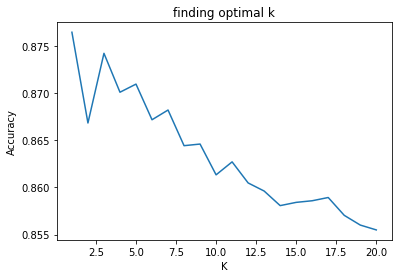

In [126]:
test_scores = []
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    test_scores.append(cross_val_score(clf,X,y,cv=4).mean())
    
import matplotlib.pyplot as plt
plt.plot(range(1,21),test_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('finding optimal k')

In [127]:
#K fold corss validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X,y, cv=10, scoring='accuracy')
print(accuracies)
accuracies.mean()

[0.8974359  0.91952055 0.89347079 0.90034364 0.88316151 0.84165232
 0.84681583 0.8313253  0.87951807 0.86746988]


0.876071380175801

In [128]:
from sklearn.model_selection import GridSearchCV
param_dict={
        'kernel':['linear','poly','rbf'],
        'degree':[2,3],
        'gamma':[0.01,0.1,1,10]
        
        
        }
clf=GridSearchCV(SVC(),param_dict)
clf.fit(X_train,y_train)
clf.best_params_
y_pred=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [129]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [130]:
#create the best model
svm=SVC(C=0.1,degree=2,gamma=0.1,kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [131]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [132]:
#K fold corss validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X,y, cv=10, scoring='accuracy')
print(accuracies)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [133]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       148
           3       1.00      1.00      1.00       411
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       268

    accuracy                           1.00      1455
   macro avg       1.00      1.00      1.00      1455
weighted avg       1.00      1.00      1.00      1455



Text(0.5, 1.0, 'finding optimal k')

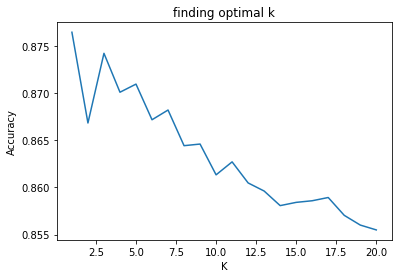

In [134]:
test_scores = []
for i in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    test_scores.append(cross_val_score(clf,X,y,cv=4).mean())
    
import matplotlib.pyplot as plt
plt.plot(range(1,21),test_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('finding optimal k')

# RANDOM FOREST

In [135]:
X = data.iloc[:,1:]
y = data.iloc[:,-1]

In [136]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [137]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)

In [138]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [139]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [140]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [141]:
cm

array([[209,   2,   1,   0,   0],
       [  4, 141,   1,   2,   0],
       [  0,   0, 411,   0,   0],
       [  0,   1,   1, 414,   0],
       [  0,   0,   0,   0, 268]], dtype=int64)

In [142]:
ac

0.9917525773195877

In [143]:
#K fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X,y, cv=10, scoring='accuracy')
print(accuracies)
accuracies.mean()
accuracies.std()

[0.99487179 0.98972603 0.98969072 0.98797251 0.99312715 0.98795181
 0.98795181 0.99483649 0.98623064 0.99483649]


0.0031937280379334817

In [144]:
accuracies.mean()

0.9907195429191591

In [145]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [146]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9917525773195877

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       212
           2       0.98      0.95      0.97       148
           3       0.99      1.00      1.00       411
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       268

    accuracy                           0.99      1455
   macro avg       0.99      0.99      0.99      1455
weighted avg       0.99      0.99      0.99      1455



In [148]:
from sklearn.model_selection import GridSearchCV
param_dict={
        'kernel':['linear','poly','rbf'],
        'degree':[2,3],
        'gamma':[0.01,0.1,1,10]
        
        
        }
clf=GridSearchCV(SVC(),param_dict)
clf.fit(X_train,y_train)
clf.best_params_
y_pred=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [149]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [150]:
#create the best model
svm=SVC(C=0.1,degree=2,gamma=0.1,kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [151]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [152]:
#K fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X,y, cv=10, scoring='accuracy')
print(accuracies)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [153]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       148
           3       1.00      1.00      1.00       411
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       268

    accuracy                           1.00      1455
   macro avg       1.00      1.00      1.00      1455
weighted avg       1.00      1.00      1.00      1455



# svm

In [154]:
X = data.iloc[:,1:]
y = data.iloc[:,-1]

In [155]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [156]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [157]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [158]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [159]:
#K fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X,y, cv=10, scoring='accuracy')
print(accuracies)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [160]:
accuracies.mean()

1.0

In [161]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [162]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.1457044673539519

In [163]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.15      1.00      0.25       212
           2       0.00      0.00      0.00       148
           3       0.00      0.00      0.00       411
           4       0.00      0.00      0.00       416
           5       0.00      0.00      0.00       268

    accuracy                           0.15      1455
   macro avg       0.03      0.20      0.05      1455
weighted avg       0.02      0.15      0.04      1455



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [164]:
from sklearn.model_selection import GridSearchCV
param_dict={
        'kernel':['linear','poly','rbf'],
        'degree':[2,3],
        'gamma':[0.01,0.1,1,10]
        
        
        }
clf=GridSearchCV(SVC(),param_dict)
clf.fit(X_train,y_train)
clf.best_params_
y_pred=clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [165]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [166]:
#create the best model
svm=SVC(C=0.1,degree=2,gamma=0.1,kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [167]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [168]:
#K fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X,y, cv=10, scoring='accuracy')
print(accuracies)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [169]:
accuracies.mean()

1.0

In [170]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [171]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [172]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       148
           3       1.00      1.00      1.00       411
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       268

    accuracy                           1.00      1455
   macro avg       1.00      1.00      1.00      1455
weighted avg       1.00      1.00      1.00      1455



In [173]:
#create the best model
svm=SVC(C=0.1,degree=2,gamma=0.1,kernel='poly')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [174]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [175]:
#K fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X,y, cv=10, scoring='accuracy')
print(accuracies)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [176]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       212
           2       1.00      1.00      1.00       148
           3       1.00      1.00      1.00       411
           4       1.00      1.00      1.00       416
           5       1.00      1.00      1.00       268

    accuracy                           1.00      1455
   macro avg       1.00      1.00      1.00      1455
weighted avg       1.00      1.00      1.00      1455

